In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


loan = pd.read_csv('accepted_2007_to_2018Q4.csv')

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
for l in range(loan.shape[1]):
    print('{}: {}'.format(l, loan.columns[l]))

0: id
1: member_id
2: loan_amnt
3: funded_amnt
4: funded_amnt_inv
5: term
6: int_rate
7: installment
8: grade
9: sub_grade
10: emp_title
11: emp_length
12: home_ownership
13: annual_inc
14: verification_status
15: issue_d
16: loan_status
17: pymnt_plan
18: url
19: desc
20: purpose
21: title
22: zip_code
23: addr_state
24: dti
25: delinq_2yrs
26: earliest_cr_line
27: fico_range_low
28: fico_range_high
29: inq_last_6mths
30: mths_since_last_delinq
31: mths_since_last_record
32: open_acc
33: pub_rec
34: revol_bal
35: revol_util
36: total_acc
37: initial_list_status
38: out_prncp
39: out_prncp_inv
40: total_pymnt
41: total_pymnt_inv
42: total_rec_prncp
43: total_rec_int
44: total_rec_late_fee
45: recoveries
46: collection_recovery_fee
47: last_pymnt_d
48: last_pymnt_amnt
49: next_pymnt_d
50: last_credit_pull_d
51: last_fico_range_high
52: last_fico_range_low
53: collections_12_mths_ex_med
54: mths_since_last_major_derog
55: policy_code
56: application_type
57: annual_inc_joint
58: dti_join

In [3]:
return_number = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

def convert_date(d):
    try:
        return datetime.date(year=int(d[4:]), month=return_number[d[:3]], day=1)
    except:
        pass

loan['issue_d'] = loan['issue_d'].apply(convert_date)
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(convert_date)

loan = loan[loan.issue_d < datetime.date(2015,7,1)]
loan = loan[loan.issue_d >= datetime.date(2010,1,1)]

loan = loan[loan.term == ' 36 months']

loan['earliest_cr_line'] = loan.apply(lambda x: (x['issue_d'] - x['earliest_cr_line']).days, axis=1)

In [4]:
loan.loan_status.value_counts()

Fully Paid                                             388613
Charged Off                                             61206
Does not meet the credit policy. Status:Fully Paid        532
Does not meet the credit policy. Status:Charged Off       158
Current                                                     1
Name: loan_status, dtype: int64

In [5]:
loan = loan[(loan.loan_status == 'Fully Paid') | (loan.loan_status == 'Charged Off')]

In [6]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
235833,53624987,NaN,6000.0,6000.0,6000.0,36 months,11.53,197.95,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
236722,53584764,NaN,6200.0,6200.0,6200.0,36 months,7.89,193.98,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
236789,53222534,NaN,19000.0,19000.0,19000.0,36 months,8.18,596.97,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
236812,53584763,NaN,5400.0,5400.0,5400.0,36 months,17.57,194.07,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
237037,53182214,NaN,4000.0,4000.0,3975.0,36 months,18.25,145.12,E,E1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


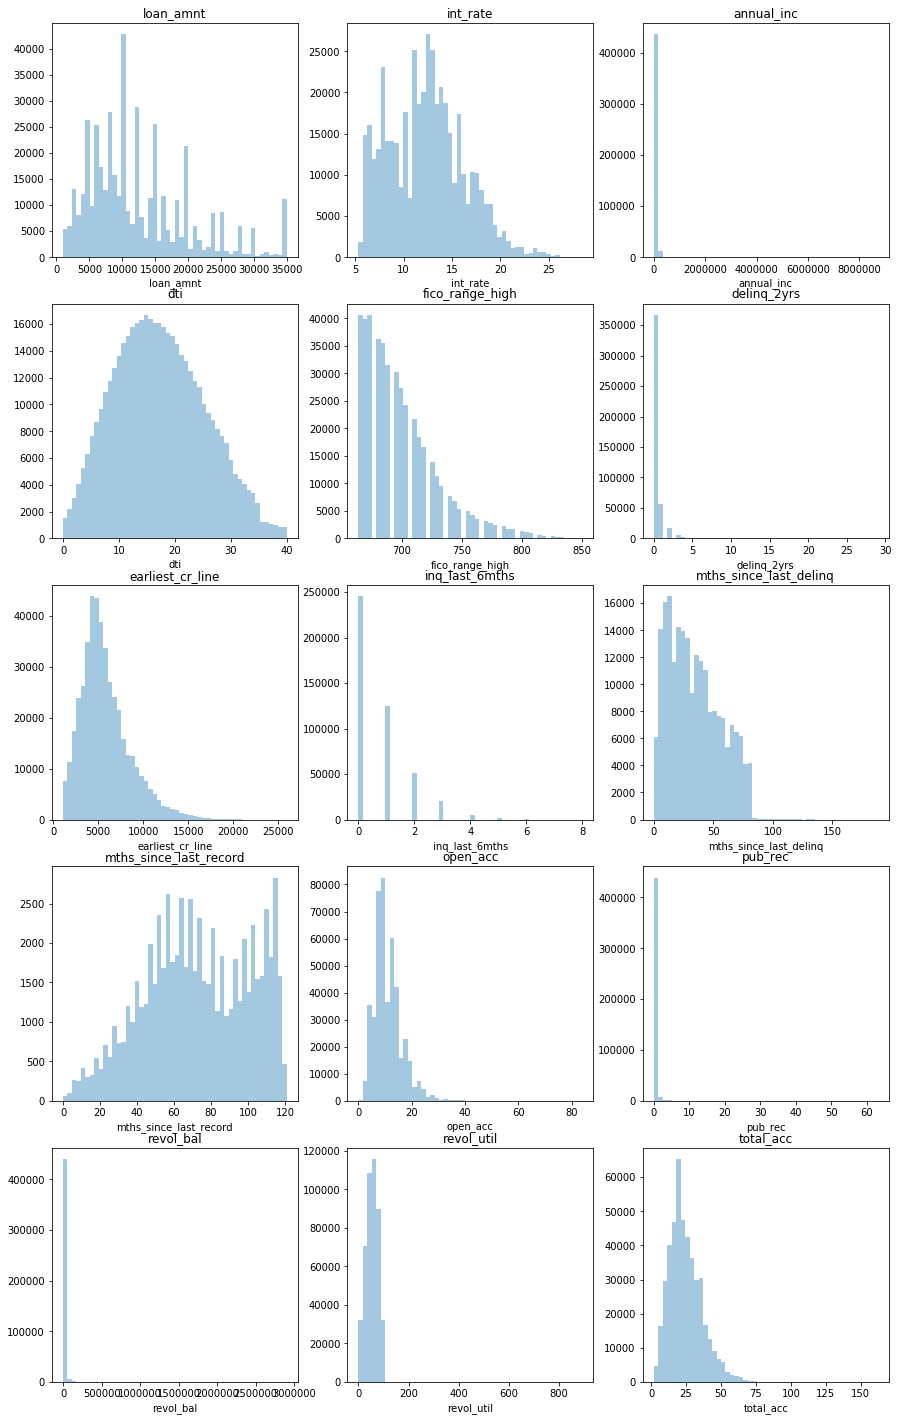

In [7]:
col_list = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_high', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']

plt.figure(figsize=(15,25))

for i in range(len(col_list)):
    plt.subplot(5,3,i+1)
    plt.title(col_list[i])
    sns.distplot(loan[col_list[i]].dropna(), kde=False)
    
plt.show()

In [8]:
loan.acc_now_delinq.value_counts()

0.0     447945
1.0       1753
2.0         97
3.0         17
4.0          4
14.0         1
6.0          1
5.0          1
Name: acc_now_delinq, dtype: int64

In [9]:
loan[loan.annual_inc > 1000000].shape

(62, 151)

In [10]:
loan = loan[loan.annual_inc < 1000000]
loan.shape

(449742, 151)

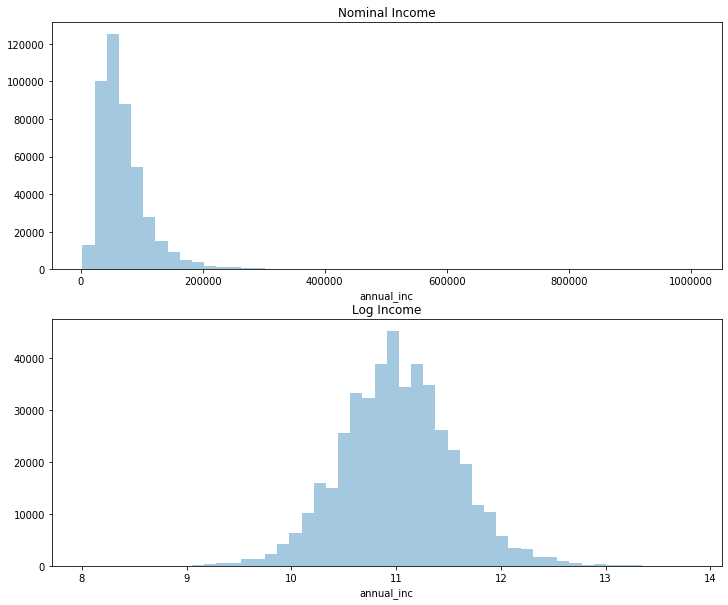

In [11]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.title('Nominal Income')
sns.distplot(loan.annual_inc, kde=False)

plt.subplot(2,1,2)
plt.title('Log Income')
sns.distplot(np.log(loan.annual_inc), kde=False)

plt.show()

In [12]:
loan['ln_annual_inc'] = np.log(loan.annual_inc)

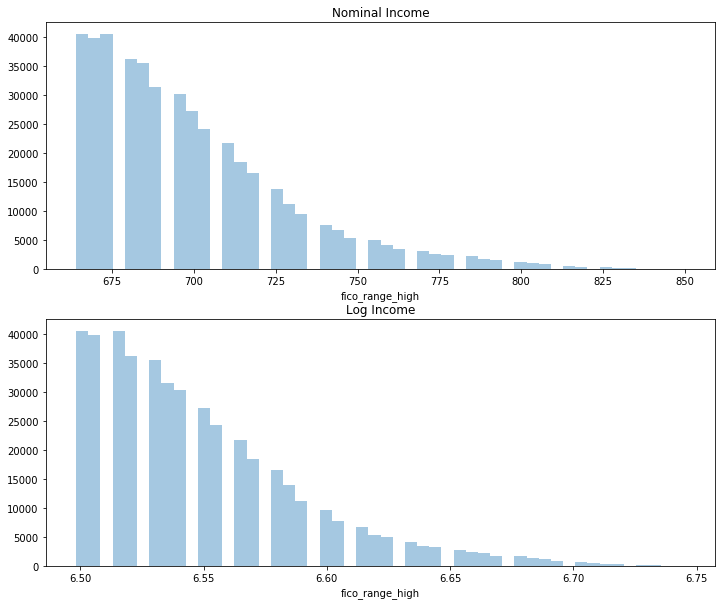

In [13]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.title('Nominal Income')
sns.distplot(loan.fico_range_high, kde=False)

plt.subplot(2,1,2)
plt.title('Log Income')
sns.distplot(np.log(loan.fico_range_high), kde=False)

plt.show()

My intuition is that Lending Club requires a certain credit score to apply for loans. 

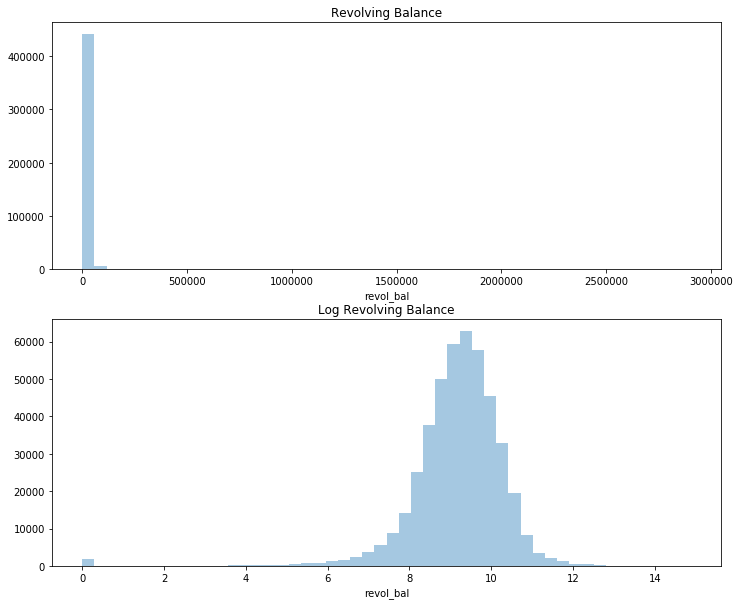

In [14]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.title('Revolving Balance')
sns.distplot(loan.revol_bal, kde=False)

plt.subplot(2,1,2)
plt.title('Log Revolving Balance')
sns.distplot(np.log(loan.revol_bal+1), kde=False)

plt.show()

In [15]:
loan = loan[loan.revol_util < 150]
loan['ln_revol_bal'] = np.log(loan.revol_bal+1)

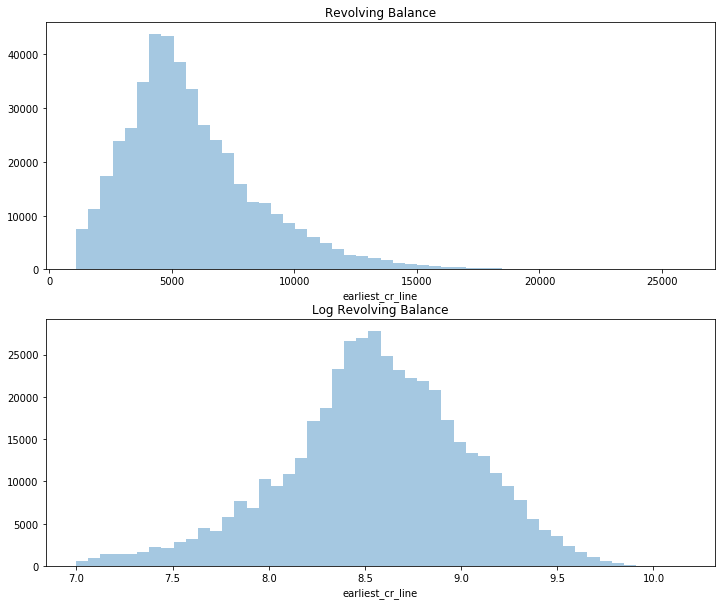

In [16]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.title('Revolving Balance')
sns.distplot(loan.earliest_cr_line, kde=False)

plt.subplot(2,1,2)
plt.title('Log Revolving Balance')
sns.distplot(np.log(loan.earliest_cr_line), kde=False)

plt.show()

In [17]:
loan['ln_earliest_cr_line'] = np.log(loan.earliest_cr_line)

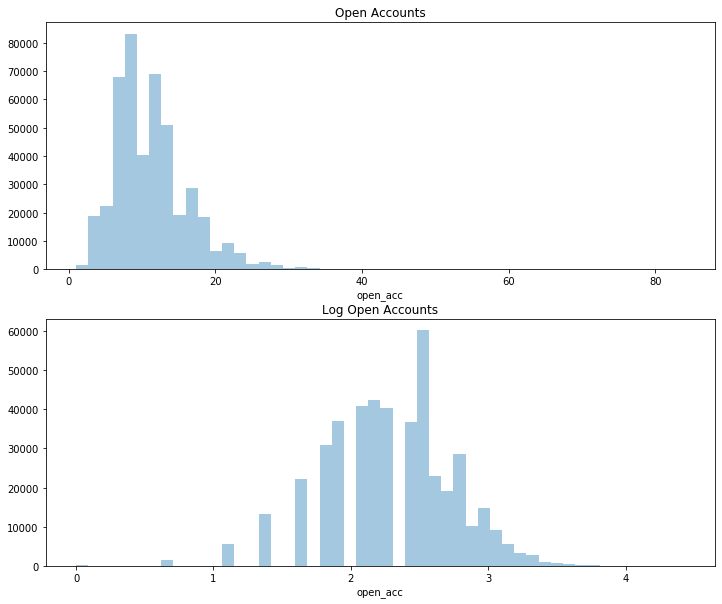

In [18]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.title('Open Accounts')
sns.distplot(loan.open_acc, kde=False)

plt.subplot(2,1,2)
plt.title('Log Open Accounts')
sns.distplot(np.log(loan.open_acc), kde=False)

plt.show()

In [19]:
loan['ln_open_acc'] = np.log(loan.open_acc)

For certain discrete variables, such as number of delinquencies in the last two years, the effect of going from 0 to 1 should be drastically more than going from 1 to 2. I created a dummy variable if this is greater than or equal to 1 to reflect this.

In [20]:
loan.rename(columns = {'delinq_2yrs': 'num_delinq_2yrs'}, inplace=True)
loan['delinq_2yrs'] = (loan['num_delinq_2yrs'] >= 1)

loan.rename(columns = {'pub_rec': 'num_pub_rec'}, inplace=True)
loan['pub_rec'] = (loan['num_pub_rec'] >= 1)

loan.rename(columns = {'inq_last_6mths': 'num_inq_last_6mths'}, inplace=True)
loan['inq_last_6mths'] = (loan['num_inq_last_6mths'] >= 1)

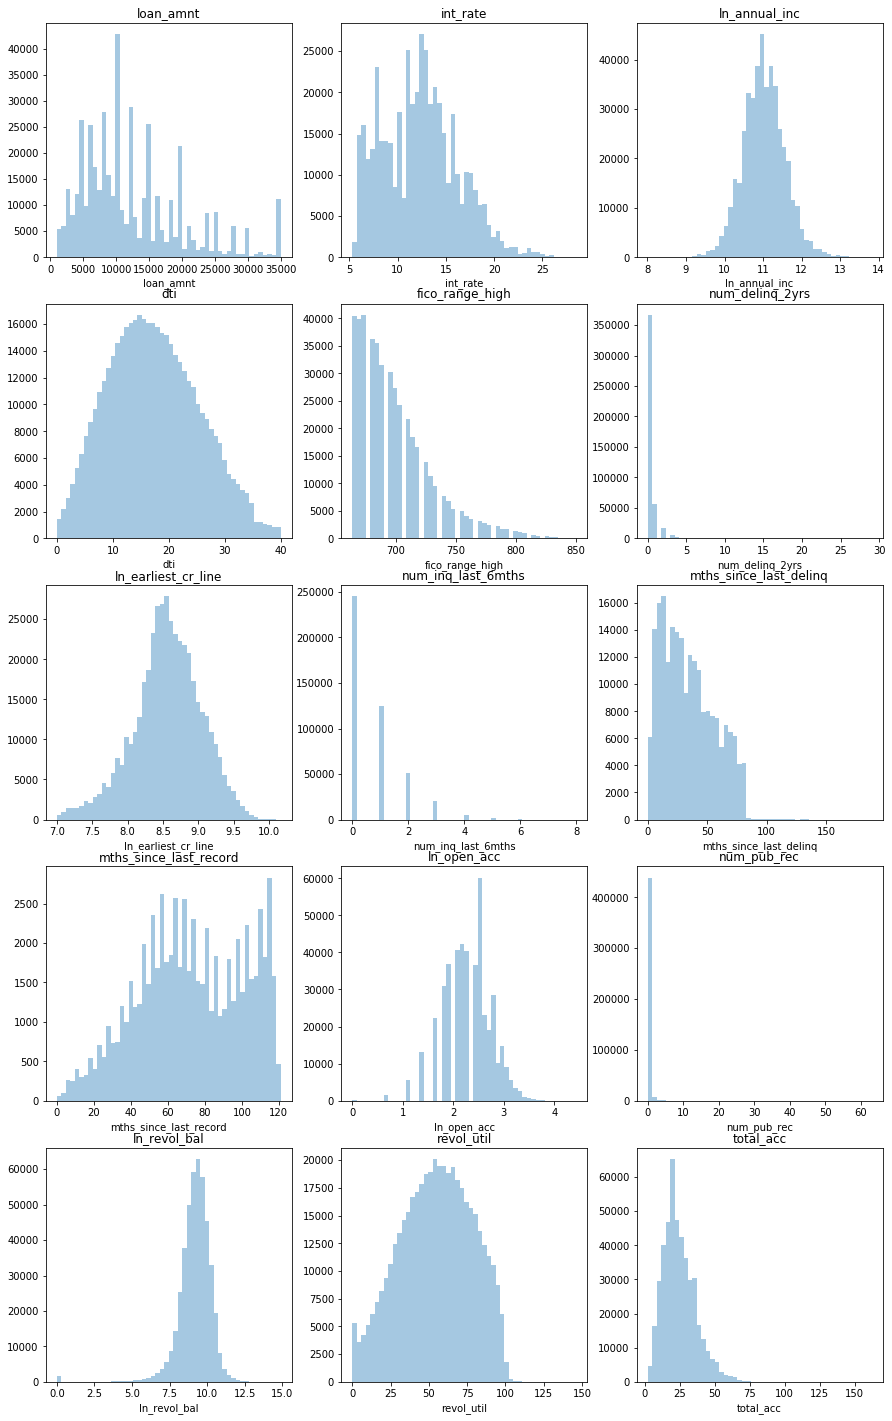

In [21]:
col_list = ['loan_amnt', 'int_rate', 'ln_annual_inc', 'dti', 'fico_range_high', 'num_delinq_2yrs', 'ln_earliest_cr_line', 'num_inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'ln_open_acc', 'num_pub_rec', 'ln_revol_bal', 'revol_util', 'total_acc']

plt.figure(figsize=(15,25))

for i in range(len(col_list)):
    plt.subplot(5,3,i+1)
    plt.title(col_list[i])
    sns.distplot(loan[col_list[i]].dropna(), kde=False)
    
plt.show()

In [22]:
loan.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,num_delinq_2yrs,earliest_cr_line,...,settlement_amount,settlement_percentage,settlement_term,ln_annual_inc,ln_revol_bal,ln_earliest_cr_line,ln_open_acc,delinq_2yrs,pub_rec,inq_last_6mths
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,NaN,1.000000,0.999657,0.999451,-0.087604,0.993790,0.458126,0.004443,-0.000337,0.175234,...,0.702236,-0.029763,0.151598,0.511449,0.395916,0.198463,0.204864,0.010480,-0.109532,-0.032888
funded_amnt,NaN,0.999657,1.000000,0.999840,-0.086948,0.994177,0.458005,0.004880,-0.000150,0.175293,...,0.702236,-0.029763,0.151598,0.511281,0.395995,0.198483,0.205035,0.010710,-0.109265,-0.032920
funded_amnt_inv,NaN,0.999451,0.999840,1.000000,-0.086433,0.994060,0.457890,0.005389,0.000100,0.175500,...,0.702141,-0.030408,0.152170,0.511106,0.396212,0.198671,0.205355,0.010997,-0.108939,-0.032789
int_rate,NaN,-0.087604,-0.086948,-0.086433,1.000000,0.003796,-0.153823,0.142246,0.069176,-0.145474,...,0.090672,-0.031668,-0.049531,-0.204623,-0.078775,-0.164876,-0.064025,0.075191,0.090987,0.229255
installment,NaN,0.993790,0.994177,0.994060,0.003796,1.000000,0.443247,0.017217,0.007005,0.161454,...,0.711585,-0.032582,0.146391,0.493726,0.387306,0.183637,0.200434,0.018589,-0.100236,-0.011644
annual_inc,NaN,0.458126,0.458005,0.457890,-0.153823,0.443247,1.000000,-0.225550,0.066430,0.205718,...,0.346884,0.000712,0.045535,0.884462,0.285063,0.228689,0.192294,0.072153,-0.045375,0.034665
dti,NaN,0.004443,0.004880,0.005389,0.142246,0.017217,-0.225550,1.000000,-0.000881,0.045396,...,0.020094,0.000061,0.031584,-0.228671,0.222504,0.056396,0.320895,0.000883,-0.039534,0.001660
num_delinq_2yrs,NaN,-0.000337,-0.000150,0.000100,0.069176,0.007005,0.066430,-0.000881,1.000000,0.097328,...,0.030199,0.042984,0.016886,0.080542,-0.054206,0.108868,0.067169,0.749854,-0.016737,0.021018
earliest_cr_line,NaN,0.175234,0.175293,0.175500,-0.145474,0.161454,0.205718,0.045396,0.097328,1.000000,...,0.111141,0.015541,0.064168,0.233917,0.207739,0.947498,0.153123,0.109221,0.110163,-0.005708
